## Dataset Overview

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# تحميل ملف البيانات
# ----------------------------------
train = pd.read_csv(r'C:\Users\LENOVO\Desktop\NN project\stock-trend-prediction\data\raw\train.csv')

In [4]:

# ----------------------------------
# عرض حجم البيانات
# ----------------------------------
num_rows, num_cols = train.shape
print(f"Dataset Size: {num_rows} rows × {num_cols} columns")

# ----------------------------------
# عرض أول 5 صفوف
# ----------------------------------
print("First 5 rows:")
display(train.head())

# ----------------------------------
# عرض آخر 5 صفوف
# ----------------------------------
print("Last 5 rows:")
display(train.tail())

# ----------------------------------
# معلومات عامة عن الـ DataFrame
# ----------------------------------
print("General DataFrame Information:")
train.info()


Dataset Size: 21033522 rows × 9 columns
First 5 rows:


,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,ticker_1,1962-01-02,0.000000,0.265828,0.261788,0.261788,25600.0,0.0,0.0
1,ticker_20,1962-01-02,0.000000,0.417455,0.412380,0.414917,84139.0,0.0,0.0
2,ticker_19,1962-01-02,0.000000,0.101537,0.100789,0.100789,902400.0,0.0,0.0
3,ticker_18,1962-01-02,0.000000,0.903030,0.881959,0.881959,51552.0,0.0,0.0
4,ticker_17,1962-01-02,0.130512,0.131783,0.129241,0.130512,163200.0,0.0,0.0


Last 5 rows:


,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
21033517,ticker_2098,2024-09-23,15.230000,15.230000,14.690000,14.780000,63400.0,0.0,0.0
21033518,ticker_3748,2024-09-23,24.700001,24.768400,24.510000,24.570000,31208.0,0.0,0.0
21033519,ticker_2615,2024-09-23,11.090000,11.150000,10.960000,11.090000,1014300.0,0.0,0.0
21033520,ticker_4765,2024-09-23,25.200001,25.202999,25.129999,25.134001,4500.0,0.0,0.0
21033521,ticker_4658,2024-09-23,0.281000,0.290000,0.264000,0.270000,272200.0,0.0,0.0


General DataFrame Information:
<class 'pandas.DataFrame'>
RangeIndex: 21033522 entries, 0 to 21033521
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Ticker        str    
 1   Date          str    
 2   Open          float64
 3   High          float64
 4   Low           float64
 5   Close         float64
 6   Volume        float64
 7   Dividends     float64
 8   Stock Splits  float64
dtypes: float64(7), str(2)
memory usage: 1.4 GB


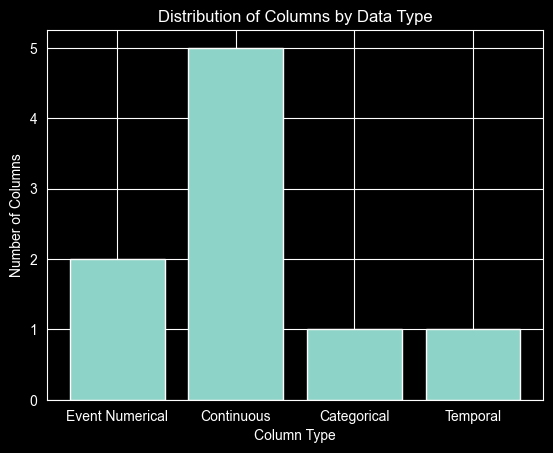

In [8]:
# Continuous Numerical Features
continuous_numerical_cols = [
    "Open",
    "High",
    "Low",
    "Close",
    "Volume"
]

# Numerical Features (Event-driven / Sparse)
event_numerical_cols = [
    "Dividends",
    "Stock Splits"
]

# Categorical Features
categorical_cols = [
    "Ticker"
]

# Temporal Features
temporal_cols = [
    "Date"
]
# ----------------------------------
# حساب عدد الأعمدة لكل نوع
# ----------------------------------
column_type_counts = {
    "Event Numerical": len(event_numerical_cols),
    "Continuous": len(continuous_numerical_cols),
    "Categorical": len(categorical_cols),
    "Temporal": len(temporal_cols)
}

# ----------------------------------
# رسم مخطط الأعمدة
# ----------------------------------
plt.figure()
plt.bar(column_type_counts.keys(), column_type_counts.values())
plt.title("Distribution of Columns by Data Type")
plt.xlabel("Column Type")
plt.ylabel("Number of Columns")
plt.show()

## Data Types & Missing Values Analysis

In [5]:
# عدد القيم المفقودة
missing_count = train.isnull().sum()

# النسبة المئوية للقيم المفقودة
missing_percentage = (missing_count / len(train)) * 100

# دمج النتائج في جدول واحد
missing_summary = pd.concat(
    [
        missing_count.rename("missing_count"),
        missing_percentage.rename("missing_percentage")
    ],
    axis=1
)

display(missing_summary)
empty_strings = (train == " ").sum() + (train == "").sum()
print(empty_strings)


,missing_count,missing_percentage
Ticker,0,0.0
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Dividends,0,0.0
Stock Splits,0,0.0


Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


البيانات نظيفة ومكتملة تماماً؛ لا توجد خلايا فارغة ($NaN$) ولا نصوص نائبة بمسافات("    " )، مما يؤكد جاهزيتها للتحليل المباشر.

In [14]:
# حساب عدد الصفوف لكل Ticker
ticker_counts = (
    train.groupby("Ticker")
      .size()
      .rename("num_observations")
      .reset_index()
)

ticker_counts.head()
coverage_stats = ticker_counts["num_observations"].agg(
    ["min", "mean", "median", "max"]
)

coverage_stats

min         224.0000
mean       4206.7044
median     3010.5000
max       15789.0000
Name: num_observations, dtype: float64

* min = 224

أقصر شركة  لها 224 سطر في الداتا اي أقل من سنة و هذا أمر خطير نوعا ما

* median = 3010.5

نصف الشركات  لها 3010 اي ما يقارب 3 سنوات

* mean = 4206

التوزيع منحاز لليمين لأن الوسيط هو أكبر من المتوسط

* max = 15789

أطول سجل زمني لشركة واحدة هو 15789


ملاحظة : الشركات صاحبة ال 224 سطر او الأقل من 500 صف تسبب عدم استقرار في التدريب او تضيف ضوجة (قد نستغني عنها)

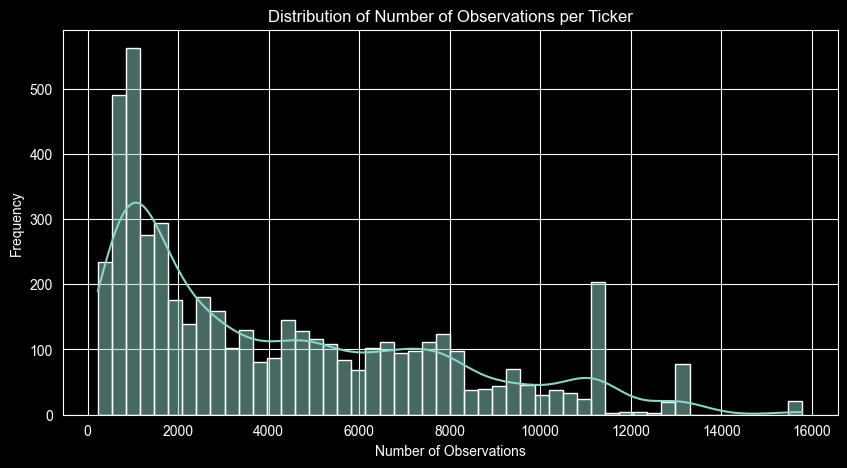

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(
    ticker_counts["num_observations"],
    bins=50,
    kde=True
)
plt.title("Distribution of Number of Observations per Ticker")
plt.xlabel("Number of Observations")
plt.ylabel("Frequency")
plt.show()

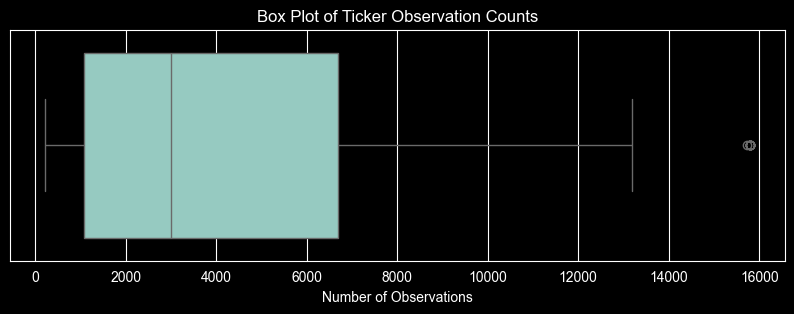

In [16]:
plt.figure(figsize=(10, 3))
sns.boxplot(
    x=ticker_counts["num_observations"]
)
plt.title("Box Plot of Ticker Observation Counts")
plt.xlabel("Number of Observations")
plt.show()

In [4]:
ticker_counts = (
    train.groupby("Ticker")
      .size()
      .rename("num_observations")
      .reset_index()
)
ticker_counts

,Ticker,num_observations
0,ticker_1,15789
1,ticker_10,15789
2,ticker_100,12996
3,ticker_1000,7527
4,ticker_1001,7526
...,...,...
4995,ticker_995,7530
4996,ticker_996,7530
4997,ticker_997,7529
4998,ticker_998,7528


 عدد أسهم الشركات القدامى كان 15789 و في مراحل حديثة اصبح عدد الأسهم تقريبا 7500 لذلك أضعف سهم لديك ما يزال يملك سجلًا زمنيًا غنيًا